In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyldavis
!pip install category_encoders
!pip install soyclustering

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=42314224945eab465af8551898890c27dfd6fad34e929b9dad2092330642cc15
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis
     |████████████████████████████████| 81kB 3.2MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from IPython.display import display
from tqdm import tqdm

In [4]:
data=pd.read_csv('/content/drive/MyDrive/colab전용/data04/train.csv/train.csv',chunksize=100000)
data=pd.concat(data,ignore_index=True)
display(data.head())

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


가만보니까 이거 저번 데이터랑 똑같다.

In [ ]:
# neg_data=data[data.amount<0]
# neg_data.groupby(['store_id'])['amount'].count().sort_values(ascending=False)
# 확실히 마이너스 위로 해서 같은 카드로 환불이 있다.
# 환불 store_id 에 어떤 정보도 있지 않는다.
# 환불에 대해서 알아보기로 했다.
neg_data[neg_data.store_id==161][:10]

NameError: name 'neg_data' is not defined

In [5]:
data['Date']=pd.to_datetime(data['date']+' '+data['time'],format='%Y-%m-%d %H:%M:%S')

In [6]:
data['hour']=data['Date'].dt.day

In [7]:
def hours(date):
    '''
    1 : 새벽
    2 : 아침
    3 : 점심
    4 : 저녁
    5 : 밤
    '''
    if date==24 or date<7:
        return 1
    elif 7<=date<11:
        return 2
    elif 11<=date<15:
        return 3
    elif 15<=date<19:
        return 4
    else:
        return 5

data['hour_band']=data['hour'].apply(hours)

In [8]:
data['wday/hours']=data['days_of_week'].apply(str)+'#'+data['hour_band'].apply(str)
data['wday/hours(norm)']=data['wday/hours'].map(data['wday/hours'].value_counts(normalize=True)*1000)

In [9]:
neg_data=data[data.amount<0]

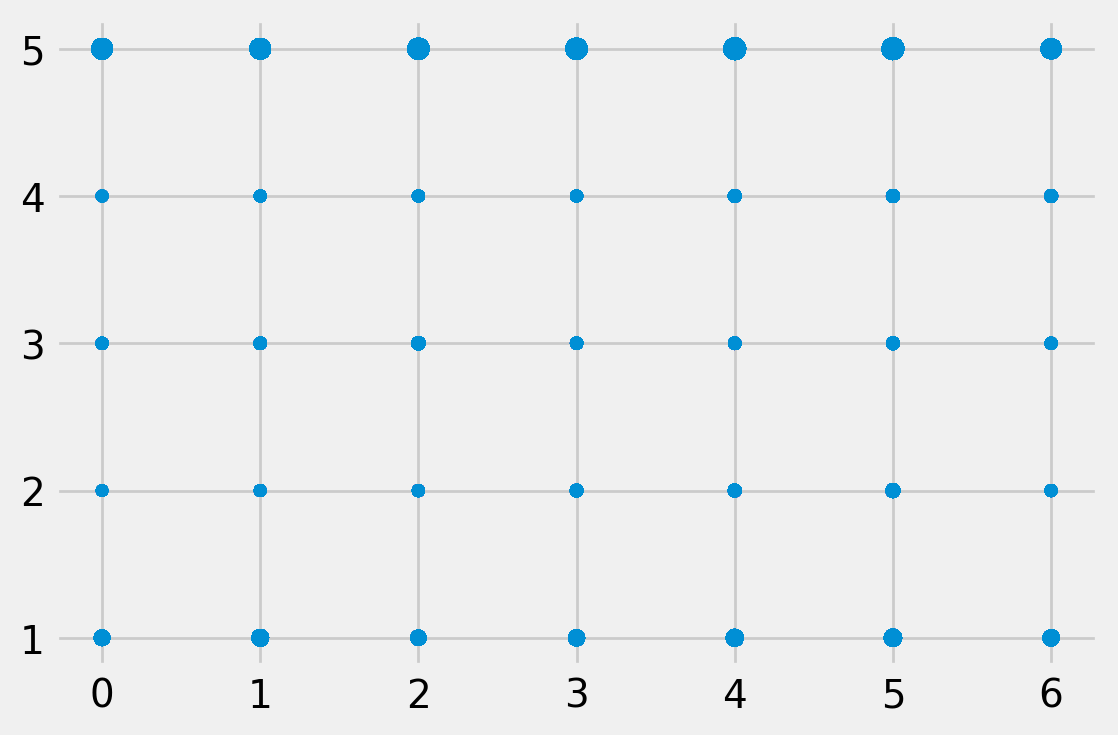

In [10]:
# 오히려 아침, 아예 밤에 환불이 많았다. 
# 161번은.
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)

store=neg_data[neg_data.store_id==161][['days_of_week','hour_band','wday/hours(norm)']]

ax.scatter(store['days_of_week'],store['hour_band'],s=store['wday/hours(norm)'])

plt.show()

In [ ]:
# pos_data=data[data.amount>0]
# neg_data=data[data.amount<0]
# reformed_data=pd.DataFrame()

# for idx in tqdm(data.store_id.unique()):
#     neg_store=neg_data[neg_data.store_id==idx]
#     pos_store=pos_data[pos_data.store_id==idx]
#     for row in neg_store.itertuples():
#         Date=getattr(row,'Date')
#         card=getattr(row,'card_id')
#         Amount=np.abs(getattr(row,'amount'))
        
#         item=pos_store[pos_store['Date']<=Date]
#         item=item[item.card_id==card]
#         item=item[item.amount==Amount]
        
#         if len(item)!=0:
#             Date=np.max(item.Date)
#             remove=pos_store[pos_store.date==Date]
#             remove=remove[remove.card_id==card]
#             remove=remove[remove.amount==Amount]
#             pos_store=pos_store.drop(index=remove.index)
            
#     reformed_data=pd.concat([reformed_data,pos_store])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.




 44%|████▎     | 776/1775 [07:24<13:21,  1.25it/s]




 44%|████▍     | 777/1775 [07:25<13:23,  1.24it/s]




 44%|████▍     | 778/1775 [07:26<13:08,  1.26it/s]




 44%|████▍     | 779/1775 [07:27<12:19,  1.35it/s]




 44%|████▍     | 780/1775 [07:27<11:13,  1.48it/s]




 44%|████▍     | 781/1775 [07:28<10:30,  1.58it/s]




 44%|████▍     | 782/1775 [07:28<10:00,  1.65it/s]




 44%|████▍     | 783/1775 [07:29<09:55,  1.67it/s]




 44%|████▍     | 784/1775 [07:29<09:38,  1.71it/s]




 44%|████▍     | 785/1775 [07:30<10:07,  1.63it/s]




 44%|████▍     | 786/1775 [07:31<10:29,  1.57it/s]




 44%|████▍     | 787/1775 [07:31<10:43,  1.54it/s]




 44%|████▍     | 788/1775 [07:32<10:58,  1.50it/s]




 44%|████▍     | 789/1775 [07:33<11:02,  1.49it/s]




 45%|████▍     | 790/1775 [07:34<11:24,  1.44it/s]




 45%|████▍     | 791/1775 [07:34<11:26,  1.43it/s]




 45%|████▍     | 792/1775 [07:35<10:29,  1.56it/s]




 45%|████▍     | 793/1775

In [ ]:
# reformed_data.to_csv('/content/drive/MyDrive/colab전용/data04/train.csv/reformed_train.csv',index=False)
data=pd.read_csv('/content/drive/MyDrive/colab전용/data04/train.csv/reformed_train.csv',chunksize=100000)
data=pd.concat(data,ignore_index=True)
display(data.head())

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,Date,hour,hour_band,wday/hours,wday/hours(norm)
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14 18:05:31,14,3,2#3,21.738458
1,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12-19 12:42:31,19,5,0#5,52.049247
2,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12-19 12:48:08,19,5,0#5,52.049247
3,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12-19 13:31:08,19,5,0#5,52.049247
4,0,2016-12-19,13:36:39,30b1422f77,44,NaN,0,0,2016-12-19 13:36:39,19,5,0#5,52.049247


In [ ]:
# 카드와 amount 같의 관계를 알아보려고 했는데 역시 수치와 수치를 가져와야지 
# 범주와 수치를 비교하려고 무리했더니 별로 좋은 결과가 나오지 못했다. 

import category_encoders as ce

oe=ce.OrdinalEncoder()

data['card_id/encode']=oe.fit_transform(data['card_id'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation

store=data[data.store_id==0]
X=store[['amount','card_id/encode']].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=71)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

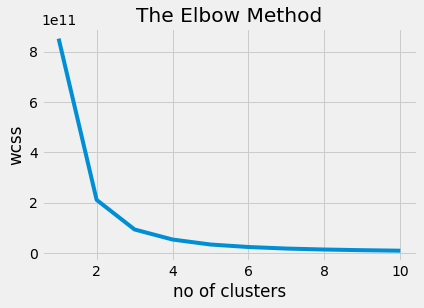

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=71)
pred=kmeans.fit_predict(X)

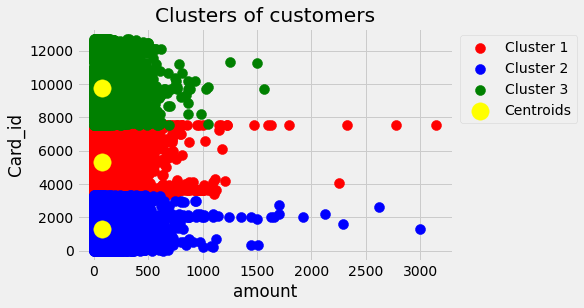

In [ ]:
plt.scatter(X[pred == 0, 0],X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1',zorder=1)
plt.scatter(X[pred == 1, 0],X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2',zorder=2)
plt.scatter(X[pred == 2, 0],X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3',zorder=999)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids',zorder=9999)
plt.title('Clusters of customers')
plt.xlabel('amount')
plt.ylabel('Card_id')
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

In [ ]:
# 분산분석 범주형간의 분석.
# https://data-newbie.tistory.com/446 범주형 분석.
pd.crosstab(data['wday/hours'],data['card_id'])

card_id,000009e765,00000f9eaa,0000134335,000024f480,000036a26b,00003c84e3,00003cb9a7,000043b1cb,000055e420,00008a3f32,00009d8355,0000ac1710,0000aee7ef,0000d054a6,0000d57476,0000d7545c,0000dbfb2a,0000ef05c6,0000f41c42,0000fb90c9,000100e4a3,0001115eba,000128f290,00012d54ae,0001325fa3,000133a3c2,00013e7b42,0001482152,00015cd611,0001d489e0,0001e52217,0001f660ef,0001f9fb0c,0001fd9314,000227febc,00022f20d1,00024393b0,00024bd326,00025a17e5,0002773979,...,fffd099265,fffd0b4adc,fffd0dd776,fffd2a0084,fffd311208,fffd42e4f4,fffd50a491,fffd5b4c3f,fffd69509b,fffd99f0e2,fffdb255d6,fffdb9e07d,fffdc40b58,fffdde9d36,fffddf54c4,fffe20995c,fffe2a01ff,fffe330e69,fffe391bbb,fffe5ea2f2,fffe96a846,fffec2ec0a,fffec779d6,ffff096fbd,ffff1bf2d7,ffff25410b,ffff3fa5cd,ffff3ffb3c,ffff4158e8,ffff444d31,ffff546f9f,ffff6c73a0,ffff7c87b3,ffff951446,ffffa20109,ffffabcd67,ffffd0294d,ffffe10b92,fffffa0825,ffffffab49
wday/hours,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0#1,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0#2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0#3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0#4,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0#5,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1#1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1#2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1#3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1#4,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
import pandas as pd
import pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# 문장을 단어로 나눠서 사용된 단어에 카운트 하는것.
from soyclustering import SphericalKMeans

In [16]:
data=pd.read_csv('/content/drive/MyDrive/colab전용/data04/train.csv/train.csv',chunksize=100000)
data=pd.concat(data,ignore_index=True)
display(data.head())

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [17]:
def convert_data(df, dateOption='str', amountOption=10):
    def convert_amount(df, amountOption=10):
        ##나누기 Option
        def divide_by_n(x, n):
            result = (x // n) * n
            if result >= 0 :
                return "pos" + str(result)
            else :
                return "neg" + str(-result)
        df['amount_modified'] = df['amount'].apply(divide_by_n, args=(amountOption,))
        #print(df[['amount', 'amount_modified']].head())
        return df

    def convert_date(df, dateOption='str'):
        df['date'] = pd.to_datetime(df['date'])
        if dateOption == 'int':
            df['date_modified'] = df['date'].dt.dayofweek
        if dateOption == 'str':
            df['date_modified'] = df['date'].dt.day_name()

        #print(df[['date', 'date_modified']].head())
        return df
    
    df = convert_amount(df)
    df = convert_date(df)
    df["class"] = df["amount_modified"].map(str) +"_"+ df["date_modified"].map(str)
    
    return df
    
data = convert_data(data)

In [18]:
#상점별 Class를 띄어쓰기를 구분자로 문자열 LIST로 변환
new_train = data.groupby('store_id')['class'].apply(lambda x: "{%s}" % ' '.join(x))
strList = new_train.values
#vectorizing
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(strList)

In [19]:
spherical_kmeans = SphericalKMeans(
    n_clusters=100,
    max_iter=10,
    verbose=1,
    init='similar_cut'
)

labels = spherical_kmeans.fit_predict(X)
centers = spherical_kmeans.cluster_centers_

# inertia 응집도 낮을수록 좋다.
# sparsity 희소성?
# https://m.blog.naver.com/PostView.nhn?blogId=qbxlvnf11&logNo=221429203293&proxyReferer=https:%2F%2Fwww.google.com%2F
# vectorize 했기 때문에.

initialization_time=0.038126 sec, sparsity=0.0328
n_iter=1, changed=1737, inertia=659.822, iter_time=0.336 sec, sparsity=0.0987
n_iter=2, changed=397, inertia=546.300, iter_time=0.313 sec, sparsity=0.0977
n_iter=3, changed=179, inertia=537.804, iter_time=0.317 sec, sparsity=0.0976
n_iter=4, changed=102, inertia=533.859, iter_time=0.318 sec, sparsity=0.0977
n_iter=5, changed=65, inertia=532.218, iter_time=0.307 sec, sparsity=0.0978
n_iter=6, changed=24, inertia=531.517, iter_time=0.318 sec, sparsity=0.0978
n_iter=7, changed=24, inertia=531.380, iter_time=0.311 sec, sparsity=0.0978
n_iter=8, changed=15, inertia=531.202, iter_time=0.308 sec, sparsity=0.0979
n_iter=9, changed=11, inertia=531.113, iter_time=0.319 sec, sparsity=0.0979
n_iter=10, changed=10, inertia=531.090, iter_time=0.323 sec, sparsity=0.0979


In [52]:
import sys
sys.path.append('/content/drive/MyDrive/colab전용')
display(sys.path)

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/colab전용']

In [49]:
# https://github.com/lovit/kmeans_to_pyLDAvis
# 일단 from은 path를 의미한다. 
# kmeans_to_pyLDAvis는 폴더 이름. 그리고 import 하는 kmeans_to_pyLDAvis 도 폴더다. 그런데 안에 __init__.py 로 모듈이라는것을 알려준다.
# 그래서 import 가 가능하고. __init__.py 에서 import 하면서 안에 다른 함수들도 불러오기기때문에 그렇다.
# 이름이 같기 때문에 폴더 네임하고 그래서. 한번만 부르고 .kmeans_to_prepared_data로 함수를 불렀다.

# 설명이 깔끔하게 된거같은데 해석을 못한다.
# 수학 식 부터 이해해야할거 같고.
# 빨간, 파란 쨌든 선택했을때의 topic이 나타나는 경우를 보여주는게 빨간색같다.
# 보여주고자 한것은 매출과 날짜의 군집화로 store_id별로 그룹화 했는데 cluster수를 100개로 잡았기때문에 그렇게 했다.
# labels 변수를 보면 어떤 store_id가 어떤 숫자그룹에 들어가있는지 알수 있다.
# 근데 간혹 눌렀을때 겹치는건 내가 볼땐 그냥 화면 깨져보이는거같은데 의미가 있는지는 모르겠다.

from kmeans_to_pyLDAvis import kmeans_to_pyLDAvis

vocab2int = vectorizer.vocabulary_
int2vocab = [
    word for word, index in sorted(
        vocab2int.items(), key=lambda x: x[1])
]
prepared_data = kmeans_to_pyLDAvis.kmeans_to_prepared_data(
    X, int2vocab, centers, labels,
    embedding_method='tsne'
)
pyLDAvis.display(prepared_data)